# Optimization in Python

### Task(Variante 8)
The monthly plan of the cutting shop is 1000 units of parts P1 and 6000 units of
parts P2.Cutting 1 unit of material by 1st method allows us to obtain 10 units of
parts P1 and 90 units of P2. 2-d method of cutting gives, respectively, 30 units of P1
and 40 units P2. Determine how many units of material to be cut by each of the
methods to ensure the total minimum of waste, if 1st method of each unit of
material gives 0.2 unit of waste and the 2nd method gives 0.31 unit of waste.

|  | P1 | P2 | | WASTE| 
| :--- | --- | --- | --- | --- |
| METHOD1 | 10 | 90 |  | 0,2 |
| METHOD2 | 30 | 40 |  | 0,31 |
| AMOUNT| 1000 | 6000 |  |



 \begin{cases}
   10x_1+90x_2\geq 1000 
   \\
   30x_1+40x_2\geq 6000
   \\
   x_1,x_2\geq 0
 \end{cases}
    
\begin{equation}
    \bar{z}=0,2x_1+0,31x_2\to min
\end{equation}

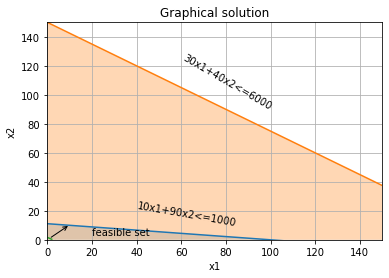

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def z(x1):
    return (0.51-0.2*x1)/0.31

def A1(x1):
    return (100-1*x1)/9

def A2(x1):
    return (600-3*x1)/4


x1 = np.arange(0, 300, 0.2)
y = np.array(np.random.randint(0,20,(25,)))
plt.axis([0,150,0,150])
plt.grid(True)
plt.plot(x1,A1(x1))
plt.fill_between(x1,A1(x1), alpha=0.2)
plt.plot(x1,A2(x1))
plt.fill_between(x1,A2(x1), alpha=0.31)


plt.plot(x1, z(x1),'--')

plt.annotate('', xy=(10,z(2)+10),xytext=(1,z(1)), arrowprops=dict(arrowstyle='->'))
plt.text(20,3,"feasible set")
plt.text(60,90,'30x1+40x2<=6000', rotation=-30)

plt.text(40,10,'10x1+90x2<=1000', rotation=-10)

plt.title('Graphical solution')
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

### using scipy.optimize.

In [10]:
from scipy.optimize import linprog
import time


c=[-0.2,-0.31]
aub=[[10,90],[30,40]]
bub=[1000,6000]
x1b=(0,None)
x2b=(0,None)
%time res = linprog(c, A_ub=aub, b_ub=bub, bounds=[x1b, x2b], method='revised simplex')

Wall time: 2.99 ms


In [11]:
print("Scipy solution: ")
print(res)
print("Optimal value: ", -res.fun)

Scipy solution: 
     con: array([], dtype=float64)
     fun: -20.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([   0., 3000.])
  status: 0
 success: True
       x: array([100.,   0.])
Optimal value:  20.0


### using pulp.LpProblem.

In [12]:
import pulp

In [13]:

x1 = pulp.LpVariable("x1",0)
x2 = pulp.LpVariable("x2",0)
problem = pulp.LpProblem("Problem", pulp.LpMaximize)
problem += 0.2*x1 + 0.31*x2, "obj func"
problem += 10*x1 + 90*x2 <= 1000
problem += 30*x1 + 40*x2 <= 6000


%time status = problem.solve()

Wall time: 25 ms


In [14]:
print("PulP solution is : ")
for var in problem.variables():
    print(var.name, "=", var.varValue)
print(pulp.value(problem.objective))

PulP solution is : 
x1 = 100.0
x2 = 0.0
20.0


### Comparing solutions

In [15]:
import numpy as np

In [16]:
np.allclose(-res.fun, pulp.value(problem.objective))

True

### 2) Solving transportation problem.

Transportation problem: There are 5 destinations (in columns) where the
products/goods are to be delivered from different 4 sources (in rows). ai
is the supply form each source; bi is the demand of each destination; cij is the cost whenthe product is delivered from i the source to j
the destination. Find a transportation plan
that will provide all customers with the necessary goods at the lowest cost.

| i/j | 1 | 2 | 3 | 4 | 5 | ai |
| --- | --- | --- | --- | --- | --- | --- |
| 1 | 11 | 3 | 7 | 10 | 9 | 85 |
| 2 | 4 | 5 | 11 | 3 | 7 | 110 |
| 3 | 15 | 10 | 6 | 5 | 8 | 65 | 
| 4 | 6 | 8 | 6 | 4 | 5 | 80 |
| bi | 90 | 70 | 70 | 60 | 50 | 340 |

In [17]:
DI = 4
SI = 5

cost = np.array([[11,3,7,10,9],[4,5,11,3,7],[15,10,6,5,8],[6,8,6,4,5]])
demand = np.array([85,110,65,80]) 
capacity = np.array([90,70,70,60,50]) 

A_eq = np.zeros(DI*SI*DI).reshape(DI, DI*SI)

for l in range(DI):
    for var in range(l*SI, l*SI+SI):
        A_eq[l, var] = 1

A_ub = np.zeros(SI*DI*SI).reshape(SI, DI*SI)

for c in range(SI):
    for var in range(c, DI*SI, SI):
        A_ub[c, var] = 1

%time tp_res = linprog(cost.flatten(), A_eq=A_eq, b_eq=demand, A_ub=A_ub, b_ub=capacity, method='revised simplex')

Wall time: 15 ms


In [18]:
print(tp_res)

     con: array([0., 0., 0., 0.])
     fun: 1485.0
 message: 'Optimization terminated successfully.'
     nit: 19
   slack: array([0., 0., 0., 0., 0.])
  status: 0
 success: True
       x: array([ 0., 70., 15.,  0.,  0., 90.,  0.,  0., 20.,  0.,  0.,  0., 55.,
       10.,  0.,  0.,  0.,  0., 30., 50.])


In [19]:
print(tp_res.x.reshape(DI, SI))

[[ 0. 70. 15.  0.  0.]
 [90.  0.  0. 20.  0.]
 [ 0.  0. 55. 10.  0.]
 [ 0.  0.  0. 30. 50.]]
